In [1]:
import allel
import subprocess, msprime, pyslim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random
import scipy.stats
import re
import pickle
import seaborn as sns
import matplotlib.backends.backend_pdf
cpal = ["#000000", "#1ce6ff", "#ff34ff", "#ff4a46", "#008941", "#006fa6", "#a30059","#ffdbe5", "#7a4900", "#0000a6", "#63ffac", "#b79762", "#004d43", "#8fb0ff", "#997d87","#5a0007", "#809693", "#1b4400", "#4fc601", "#3b5dff", "#4a3b53", "#ff2f80","#61615a", "#ba0900", "#6b7900", "#00c2a0", "#ffaa92", "#ff90c9", "#b903aa", "#d16100","#ddefff", "#000035", "#7b4f4b", "#a1c299", "#300018", "#0aa6d8", "#013349", "#00846f","#372101", "#ffb500", "#c2ffed", "#a079bf", "#cc0744", "#c0b9b2", "#c2ff99", "#001e09","#00489c", "#6f0062", "#0cbd66", "#eec3ff", "#456d75", "#b77b68", "#7a87a1", "#788d66","#885578", "#fad09f", "#ff8a9a", "#d157a0"]
sns.set_palette(sns.color_palette(cpal))
plt.rcParams['figure.figsize'] = [15, 10]



In [2]:
n_sims=5
n_pop=2
T=np.concatenate([np.arange(0,2.2,step=0.4), np.arange(4,11,step=2)])
T = [float("%.1f"%t) for t in T]
#path="/Users/murillo/Drive/phd/w19/rotation/mimulus/pkls/pis/"
#path2="/Users/murillo/Drive/phd/w19/rotation/mimulus/pkls/div/"
#path3="/Users/murillo/Drive/phd/w19/rotation/mimulus/pkls/"


path="/Users/murillo/Drive/phd/s19/mimulus_sims/pkls/pis/"
path2="/Users/murillo/Drive/phd/s19/mimulus_sims/pkls/div/"
path3="/Users/murillo/Drive/phd/s19/mimulus_sims/pkls/fst/"
path4="/Users/murillo/Drive/phd/s19/mimulus_sims/"

markers=[]

In [3]:
col_names =  ['N', 'non_neutral_mu','rec', 'L', 'L0', 'L1', 'm', 'ndeff', 'nprop', 'pdeff', 'pprop','n_sim','localintro','label'] + list(map(lambda x: "corpi_T_"+str(x), T)) + list(map(lambda x: "corpidiv0_T_"+str(x), T)) + list(map(lambda x: "corpidiv1_T_"+str(x), T)) + list(map(lambda x: "corpifst0_T_"+str(x), T)) + list(map(lambda x: "corpifst1_T_"+str(x), T))
#col_names =  ['N', 'non_neutral_mu','rec', 'deff','L', 'L0', 'L1', 'm','n_sim'] + list(map(lambda x: "corpi_T_"+str(x), T)) + list(map(lambda x: "corpidiv0_T_"+str(x), T)) + list(map(lambda x: "corpidiv1_T_"+str(x), T))
my_df  = pd.DataFrame(columns = col_names)
print(my_df)
col_names =  ['N', 'non_neutral_mu','rec', 'L', 'L0', 'L1', 'm', 'ndeff', 'nprop', 'pdeff', 'pprop','n_sim','label','time','pop','win','pi']
pis_df = pd.DataFrame(columns = col_names)
col_names =  ['N', 'non_neutral_mu','rec', 'L', 'L0', 'L1', 'm', 'ndeff', 'nprop', 'pdeff', 'pprop','n_sim','label','time','win','div']
div_df = pd.DataFrame(columns = col_names)
fst_df = pd.DataFrame(columns = col_names[:-1]+['fst'])
print(pis_df.head())
print(div_df.head())
print(fst_df.head())





Empty DataFrame
Columns: [N, non_neutral_mu, rec, L, L0, L1, m, ndeff, nprop, pdeff, pprop, n_sim, localintro, label, corpi_T_0.0, corpi_T_0.4, corpi_T_0.8, corpi_T_1.2, corpi_T_1.6, corpi_T_2.0, corpi_T_4.0, corpi_T_6.0, corpi_T_8.0, corpi_T_10.0, corpidiv0_T_0.0, corpidiv0_T_0.4, corpidiv0_T_0.8, corpidiv0_T_1.2, corpidiv0_T_1.6, corpidiv0_T_2.0, corpidiv0_T_4.0, corpidiv0_T_6.0, corpidiv0_T_8.0, corpidiv0_T_10.0, corpidiv1_T_0.0, corpidiv1_T_0.4, corpidiv1_T_0.8, corpidiv1_T_1.2, corpidiv1_T_1.6, corpidiv1_T_2.0, corpidiv1_T_4.0, corpidiv1_T_6.0, corpidiv1_T_8.0, corpidiv1_T_10.0, corpifst0_T_0.0, corpifst0_T_0.4, corpifst0_T_0.8, corpifst0_T_1.2, corpifst0_T_1.6, corpifst0_T_2.0, corpifst0_T_4.0, corpifst0_T_6.0, corpifst0_T_8.0, corpifst0_T_10.0, corpifst1_T_0.0, corpifst1_T_0.4, corpifst1_T_0.8, corpifst1_T_1.2, corpifst1_T_1.6, corpifst1_T_2.0, corpifst1_T_4.0, corpifst1_T_6.0, corpifst1_T_8.0, corpifst1_T_10.0]
Index: []

[0 rows x 64 columns]
Empty DataFrame
Columns: [N, non_n

N_10000_mu_1.00e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0_ndeff_10.0_nprop_0.1_pdeff_0.0_pprop_0.0_pis.pkl
Neg -Ns=10.0 +Prop=0.1
N_10000_mu_5.56e-10_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0.1_deff_100.0_pis.pkl
BDM -Ns=100.0 -Prop=0.05 Nm=0.1
N_10000_mu_1.11e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_1_deff_100.0_pis.pkl
BDM -Ns=100.0 -Prop=0.1 Nm=1.0
N_10000_mu_1.11e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0.1_deff_10.0_pis.pkl
BDM -Ns=10.0 -Prop=0.1 Nm=0.1
LOCAL= ('10000', '1.50e-10', '2e-08', '21000000', '7000000', '7000000', '0.1', '0', '0', '100.0', '0.005')
N_10000_mu_1.50e-10_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0.1_deff_100.0_pis.pkl
Local +Ns=100.0 +Prop=0.005 Nm=0.1
N_10000_mu_1.11e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0.1_deff_100.0_pis.pkl
BDM -Ns=100.0 -Prop=0.1 Nm=0.1
LOCAL= ('10000', '3.00e-11', '2e-08', '21000000', '7000000', '7000000', '1', '0', '0', '100.0', '0.001')
N_10000_mu_3.00e-11_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_1_

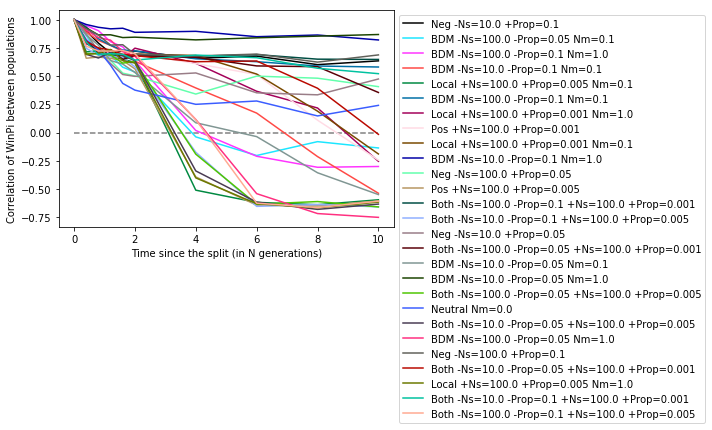

In [4]:
directory = os.fsencode(path)


for file in os.listdir(directory):
    #print(file)
    localintro=False
    filename = os.fsdecode(file)
    matches = re.match( r'N_(\d+)_mu_(.*)_r_(.*)_L_(\d+)_L0_(.+)_L1_(\d+)_m_(.+)_ndeff_(.+)_nprop_(.+)_pdeff_(.+)_pprop_(.+)_pis\.pkl', filename)
    if not matches:
        localintro=True
        matches = re.match( r'N_(\d+)_mu_(.*)_r_(.*)_L_(\d+)_L0_(.+)_L1_(\d+)_m_(.+)_deff_(.+)_pis\.pkl', filename)
        matches  = matches.groups()
        if(matches[1] in ['1.50e-10', '3.00e-11']):
            matches = matches[:-1]+(str(0),)+(str(0),)+(matches[-1],)+(str(float(matches[1])/3/1e-8),)
            print("LOCAL=",matches)
        else:
            matches = matches[:-1]+(matches[-1],)+(str(round(float(matches[1])*0.9/1e-8,2)),)+(str(0),)+(str(0),)
    else:
        matches  = matches.groups()
            
    #N, del_mut, r, L, L0, L1, m,ndeff,nprop,pdeff,pprop  = matches.groups()
    #del_mut, ndeff, nprop, pdeff, pprop = float(del_mut), float(ndeff), float(nprop), float(pdeff), float(pprop)
    #L, L0, L1 = int(L), int(L0),int(L1)
    matches = list(map(lambda x: float(x), matches))
    
    mpre = re.match( r'(N_.+)_pis\.pkl', filename)
    prefix = mpre.group(1)
    print(filename)
    pkl_file = open(path+filename, 'rb')
    pis = pickle.load(pkl_file)
    pkl_file.close()
    pkl_file = open(path2+prefix+"_div.pkl", 'rb')
    div = pickle.load(pkl_file)
    pkl_file.close()
    pkl_file = open(path3+prefix+"_fst.pkl", 'rb')
    fst = pickle.load(pkl_file)
    pkl_file.close()
    cor = np.zeros((len(T),n_sims))
    cor0 = np.zeros((len(T),n_sims))
    cor1 = np.zeros((len(T),n_sims))
    cor0f = np.zeros((len(T),n_sims))
    cor1f = np.zeros((len(T),n_sims))
    if not localintro:
        if matches[8] < 0.0001 and matches[10] < 0.0001:
            lb = "Neutral Nm="+str(matches[6])
        elif matches[8] < 0.0001:
            lb = "Pos +Ns="+str(matches[9])+" +Prop="+str(matches[10])
        elif matches[10] < 0.0001:
            lb = "Neg -Ns="+str(matches[7])+" +Prop="+str(matches[8])
        else:
            lb = "Both -Ns="+str(matches[7])+" -Prop="+str(matches[8])+" +Ns="+str(matches[9])+" +Prop="+str(matches[10])
    else:
        if(matches[1] in [1.50e-10, 3.00e-11]):
            lb = "Local +Ns="+str(matches[9])+" +Prop="+str(matches[10])+" Nm="+str(matches[6])
        else:
            lb = "BDM -Ns="+str(matches[7])+" -Prop="+str(matches[8])+" Nm="+str(matches[6])
    print(lb)
    for i in range(n_sims):
        for t in range(len(T)):
            cor[t,i] = scipy.stats.spearmanr(pis[t,i,:,:],axis = 1)[0]
            cor0[t,i] = scipy.stats.spearmanr(pis[t,i,0,:],div[t,i,0,:])[0]
            cor1[t,i] = scipy.stats.spearmanr(pis[t,i,1,:],div[t,i,0,:])[0]
            cor0f[t,i] = scipy.stats.spearmanr(pis[t,i,0,:],fst[t,i,0,:])[0]
            cor1f[t,i] = scipy.stats.spearmanr(pis[t,i,1,:],fst[t,i,0,:])[0]
            #print(cor0f[t,i])
        my_df.loc[len(my_df)] = list(matches) + list([float(i)]) + list([localintro]) + list([lb]) + cor[:,i].tolist() + cor0[:,i].tolist() + cor1[:,i].tolist() + cor0f[:,i].tolist() + cor1f[:,i].tolist() 
    plt.plot(T,np.mean(cor0, axis = 1), label=lb)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
#handles, labels = plt.gca().get_legend_handles_labels()
#order = [3,5,2,1,4,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1,1))
plt.ylabel("Correlation of WinPi between populations")
plt.xlabel("Time since the split (in N generations)")
plt.hlines(y=0, xmin=0, xmax=10, linestyle="--", colors="gray")
plt.savefig(path3+"correlation_winpi_time.pdf", bbox_inches='tight')

In [6]:
my_df = my_df.sort_values(by=["label"])
my_df.to_csv(path4+"corr.csv")
filter_col = [col for col in my_df if col.startswith('cor')]
tmp = my_df[['label']+filter_col].groupby(['label'])
sim_means = tmp.mean()
sim_means.to_csv(path4+"corr_means.csv")
sim_means

,corpi_T_0.0,corpi_T_0.4,corpi_T_0.8,corpi_T_1.2,corpi_T_1.6,corpi_T_2.0,corpi_T_4.0,corpi_T_6.0,corpi_T_8.0,corpi_T_10.0,...,corpifst1_T_0.0,corpifst1_T_0.4,corpifst1_T_0.8,corpifst1_T_1.2,corpifst1_T_1.6,corpifst1_T_2.0,corpifst1_T_4.0,corpifst1_T_6.0,corpifst1_T_8.0,corpifst1_T_10.0
label,,,,,,,,,,,,,,,,,,,,,
BDM -Ns=10.0 -Prop=0.05 Nm=0.1,0.998801,0.755449,0.600713,0.496378,0.442703,0.437841,0.330427,0.293607,0.302812,0.326440,...,0.119780,-0.154785,-0.325500,-0.304238,-0.413791,-0.539519,-0.566972,-0.730459,-0.732177,-0.737849
BDM -Ns=10.0 -Prop=0.05 Nm=1.0,0.998541,0.821343,0.770489,0.696362,0.699895,0.680998,0.700381,0.734835,0.774475,0.777846,...,0.034017,-0.095276,-0.253415,-0.126068,-0.239867,-0.312438,-0.296038,-0.322940,-0.397002,-0.359533
BDM -Ns=10.0 -Prop=0.1 Nm=0.1,0.998736,0.776906,0.740734,0.660060,0.592253,0.566745,0.547362,0.576371,0.571510,0.636075,...,0.042152,-0.225184,-0.288259,-0.428798,-0.413402,-0.498161,-0.697529,-0.795641,-0.823353,-0.857937
BDM -Ns=10.0 -Prop=0.1 Nm=1.0,0.999060,0.890803,0.834633,0.862345,0.857191,0.811328,0.822705,0.771850,0.794506,0.803549,...,-0.068017,-0.052686,-0.212673,-0.385366,-0.405591,-0.289263,-0.621198,-0.475504,-0.633093,-0.642719
BDM -Ns=100.0 -Prop=0.05 Nm=0.1,0.999092,0.722065,0.483834,0.517965,0.480593,0.412884,0.392172,0.456478,0.504157,0.425784,...,0.031489,-0.123410,-0.266121,-0.382416,-0.523766,-0.548497,-0.656916,-0.707382,-0.784458,-0.707544
BDM -Ns=100.0 -Prop=0.05 Nm=1.0,0.998768,0.796127,0.737298,0.731464,0.693477,0.670302,0.646188,0.645312,0.680804,0.690203,...,-0.030127,-0.175302,-0.206677,-0.398655,-0.442249,-0.576047,-0.805461,-0.857159,-0.883121,-0.863901
BDM -Ns=100.0 -Prop=0.1 Nm=0.1,0.999157,0.834438,0.722940,0.687643,0.658699,0.653253,0.571056,0.598606,0.584086,0.571380,...,0.078778,-0.401507,-0.357913,-0.530638,-0.606353,-0.663690,-0.734446,-0.739989,-0.737072,-0.742128
BDM -Ns=100.0 -Prop=0.1 Nm=1.0,0.998833,0.893947,0.818459,0.794960,0.788542,0.671696,0.684661,0.660384,0.640029,0.670335,...,0.002058,-0.275780,-0.451487,-0.641715,-0.753180,-0.721027,-0.859558,-0.875861,-0.841018,-0.854728
Both -Ns=10.0 -Prop=0.05 +Ns=100.0 +Prop=0.001,0.999546,0.820695,0.708840,0.705599,0.722162,0.684142,0.637890,0.660028,0.704205,0.650271,...,-0.141820,-0.871226,-0.853561,-0.871420,-0.887400,-0.881306,-0.893623,-0.888664,-0.894368,-0.867337


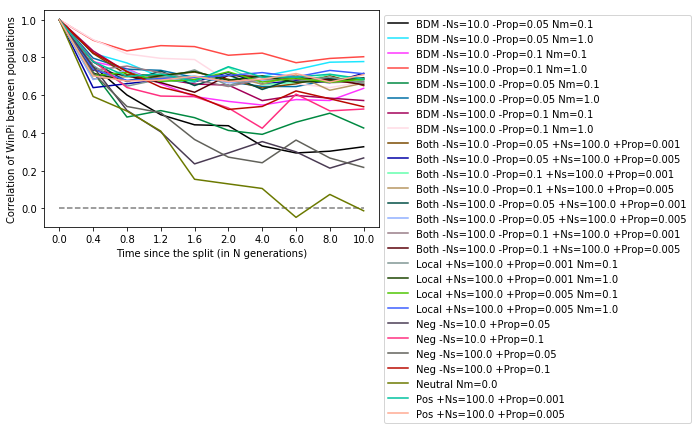

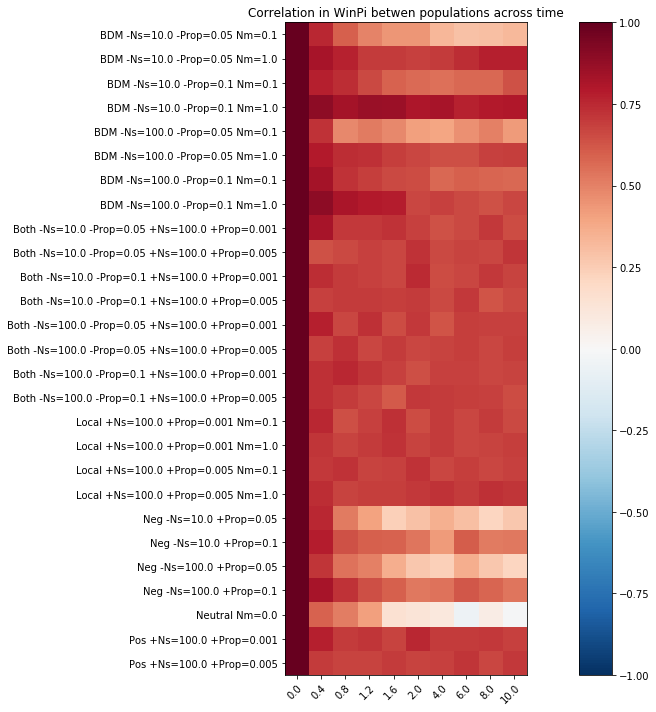

In [7]:
cols = [col for col in sim_means if col.startswith('corpi_')]
T = [col.split('_')[-1] for col in sim_means if col.startswith('corpi_')]
for index, row in sim_means.iterrows():
    plt.plot(T,row[cols], label=index)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel("Correlation of WinPi between populations")
plt.xlabel("Time since the split (in N generations)")
plt.hlines(y=0, xmin=0, xmax=9, linestyle="--", colors="gray")
#plt.savefig(path3+"correlation_winpi_time.pdf", bbox_inches='tight')

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
im = ax.imshow(sim_means[cols], cmap="RdBu_r", vmin=-1, vmax=1)
im = ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(T)))
ax.set_yticks(np.arange(len(sim_means.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(T)
ax.set_yticklabels(sim_means.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Correlation in WinPi betwen populations across time")
fig.tight_layout()
plt.savefig(path4+"corr_pis.pdf", bbox_inches='tight')
plt.show()

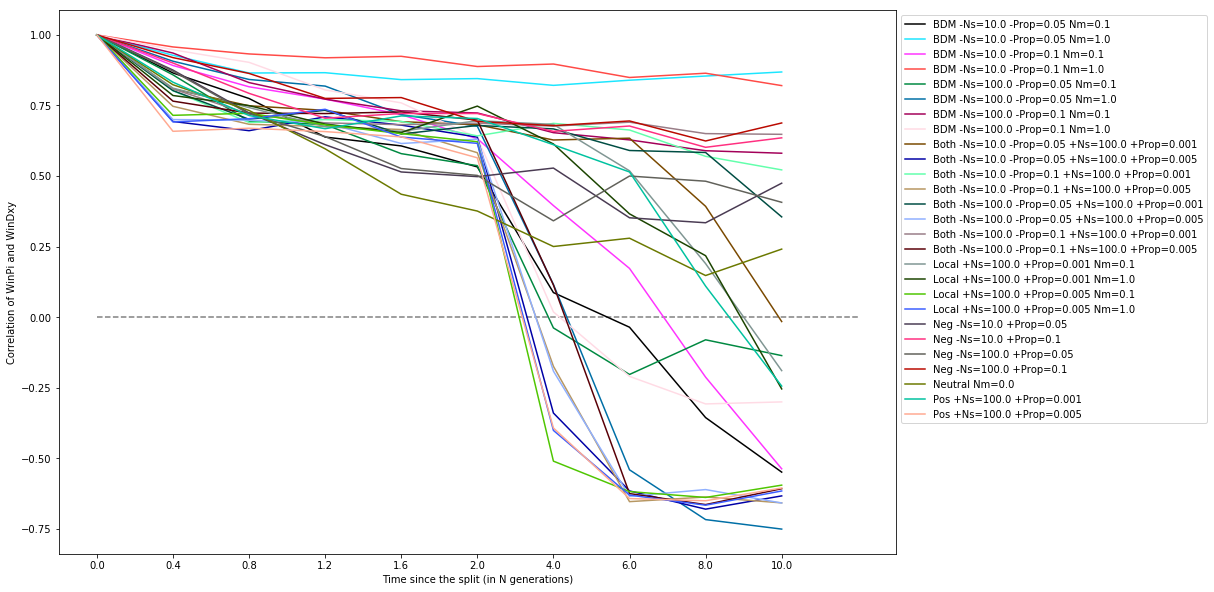

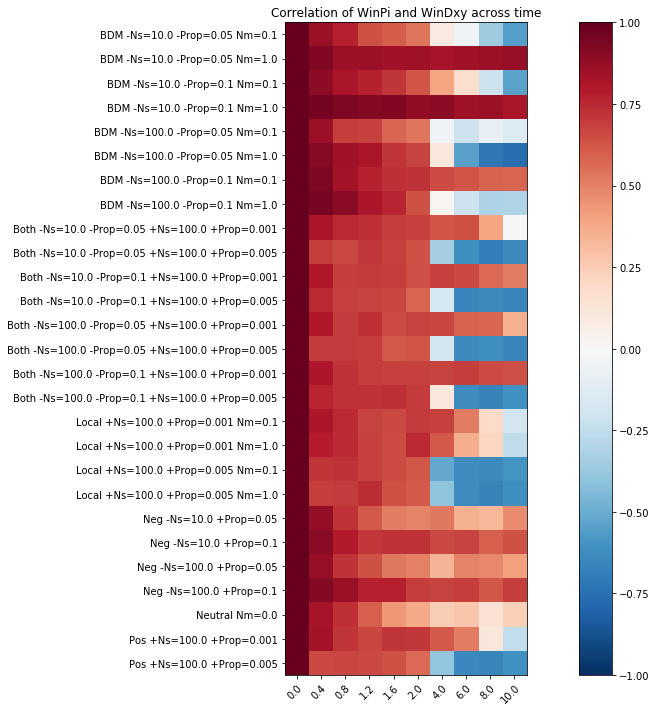

In [8]:
cols = [col for col in sim_means if col.startswith('corpidiv0_')]
T = [col.split('_')[-1] for col in sim_means if col.startswith('corpidiv0_')]
for index, row in sim_means.iterrows():
    plt.plot(T,row[cols], label=index)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel("Correlation of WinPi and WinDxy")
plt.xlabel("Time since the split (in N generations)")
plt.hlines(y=0, xmin=0, xmax=10, linestyle="--", colors="gray")
#plt.savefig(path3+"correlation_winpi_time.pdf", bbox_inches='tight')

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
im = ax.imshow(sim_means[cols], cmap="RdBu_r", vmin=-1, vmax=1)
im = ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(T)))
ax.set_yticks(np.arange(len(sim_means.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(T)
ax.set_yticklabels(sim_means.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Correlation of WinPi and WinDxy across time")
fig.tight_layout()
plt.savefig(path4+"corr_pidiv.pdf", bbox_inches='tight')
plt.show()

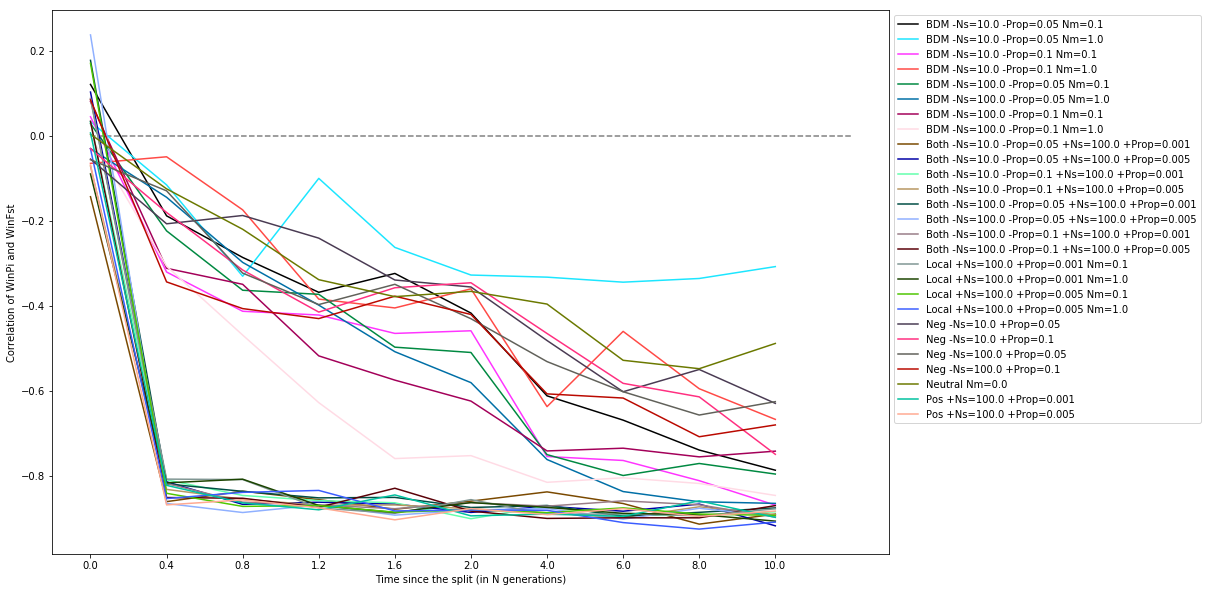

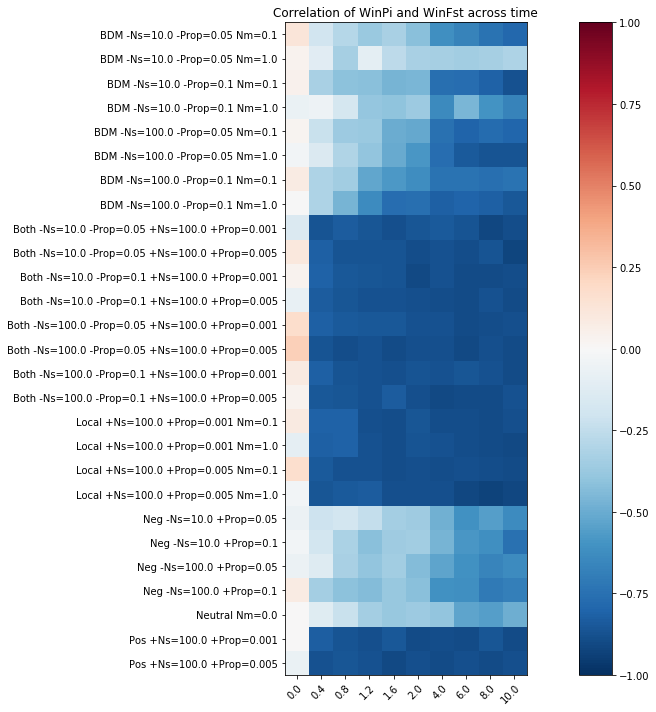

In [9]:
cols = [col for col in sim_means if col.startswith('corpifst0_')]
T = [col.split('_')[-1] for col in sim_means if col.startswith('corpifst0_')]
for index, row in sim_means.iterrows():
    plt.plot(T,row[cols], label=index)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel("Correlation of WinPi and WinFst")
plt.xlabel("Time since the split (in N generations)")
plt.hlines(y=0, xmin=0, xmax=10, linestyle="--", colors="gray")
#plt.savefig(path3+"correlation_winpi_time.pdf", bbox_inches='tight')

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
im = ax.imshow(sim_means[cols], cmap="RdBu_r", vmin=-1, vmax=1)
im = ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(T)))
ax.set_yticks(np.arange(len(sim_means.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(T)
ax.set_yticklabels(sim_means.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Correlation of WinPi and WinFst across time")
fig.tight_layout()
plt.savefig(path4+"corr_pifst.pdf", bbox_inches='tight')
plt.show()

In [10]:
win = np.arange(1,43)
col_names =  ['N', 'non_neutral_mu','rec', 'L', 'L0', 'L1', 'm', 'ndeff', 'nprop', 'pdeff', 'pprop','label','T'] + list(map(lambda x: "pi0_win_"+str(x),win)) + list(map(lambda x: "pi1_win_"+str(x),win)) + list(map(lambda x: "div_win_"+str(x),win)) + list(map(lambda x: "fst_win_"+str(x),win)) 
raw  = pd.DataFrame(columns = col_names)
print(raw)


Empty DataFrame
Columns: [N, non_neutral_mu, rec, L, L0, L1, m, ndeff, nprop, pdeff, pprop, label, T, pi0_win_1, pi0_win_2, pi0_win_3, pi0_win_4, pi0_win_5, pi0_win_6, pi0_win_7, pi0_win_8, pi0_win_9, pi0_win_10, pi0_win_11, pi0_win_12, pi0_win_13, pi0_win_14, pi0_win_15, pi0_win_16, pi0_win_17, pi0_win_18, pi0_win_19, pi0_win_20, pi0_win_21, pi0_win_22, pi0_win_23, pi0_win_24, pi0_win_25, pi0_win_26, pi0_win_27, pi0_win_28, pi0_win_29, pi0_win_30, pi0_win_31, pi0_win_32, pi0_win_33, pi0_win_34, pi0_win_35, pi0_win_36, pi0_win_37, pi0_win_38, pi0_win_39, pi0_win_40, pi0_win_41, pi0_win_42, pi1_win_1, pi1_win_2, pi1_win_3, pi1_win_4, pi1_win_5, pi1_win_6, pi1_win_7, pi1_win_8, pi1_win_9, pi1_win_10, pi1_win_11, pi1_win_12, pi1_win_13, pi1_win_14, pi1_win_15, pi1_win_16, pi1_win_17, pi1_win_18, pi1_win_19, pi1_win_20, pi1_win_21, pi1_win_22, pi1_win_23, pi1_win_24, pi1_win_25, pi1_win_26, pi1_win_27, pi1_win_28, pi1_win_29, pi1_win_30, pi1_win_31, pi1_win_32, pi1_win_33, pi1_win_34, pi1_

In [11]:
directory = os.fsencode(path)
#pdf = matplotlib.backends.backend_pdf.PdfPages(path3+"landscapes_2N_examplesim.pdf")
lisf = os.listdir(directory)


for file in lisf:
    localintro=False
    filename = os.fsdecode(file)
    matches = re.match( r'N_(\d+)_mu_(.*)_r_(.*)_L_(\d+)_L0_(.+)_L1_(\d+)_m_(.+)_ndeff_(.+)_nprop_(.+)_pdeff_(.+)_pprop_(.+)_pis\.pkl', filename)
    if not matches:
        localintro=True
        matches = re.match( r'N_(\d+)_mu_(.*)_r_(.*)_L_(\d+)_L0_(.+)_L1_(\d+)_m_(.+)_deff_(.+)_pis\.pkl', filename)
        matches  = matches.groups()
        if(matches[1] in ['1.50e-10', '3.00e-11']):
            matches = matches[:-1]+(str(0),)+(str(0),)+(matches[-1],)+(str(float(matches[1])/3/1e-8),)
            #print("LOCAL=",matches)
        else:
            matches = matches[:-1]+(matches[-1],)+(str(round(float(matches[1])*0.9/1e-8,2)),)+(str(0),)+(str(0),)
    else:
        matches  = matches.groups()
    matches = list(map(lambda x: float(x), matches))
    
    if not localintro:
        if matches[8] < 0.0001 and matches[10] < 0.0001:
            lb = "Neutral Nm="+str(matches[6])
        elif matches[8] < 0.0001:
            lb = "Pos +Ns="+str(matches[9])+" +Prop="+str(matches[10])
        elif matches[10] < 0.0001:
            lb = "Neg -Ns="+str(matches[7])+" +Prop="+str(matches[8])
        else:
            lb = "Both -Ns="+str(matches[7])+" -Prop="+str(matches[8])+" +Ns="+str(matches[9])+" +Prop="+str(matches[10])
    else:
        if(matches[1] in [1.50e-10, 3.00e-11]):
            lb = "Local +Ns="+str(matches[9])+" +Prop="+str(matches[10])+" Nm="+str(matches[6])
        else:
            lb = "BDM -Ns="+str(matches[7])+" -Prop="+str(matches[8])+" Nm="+str(matches[6])
    print(lb)
    
    mpre = re.match( r'(N_.+)_pis\.pkl', filename)
    prefix = mpre.group(1)
    print(filename)
    pkl_file = open(path+filename, 'rb')
    pis = pickle.load(pkl_file)
    pkl_file.close()
    pkl_file = open(path2+prefix+"_div.pkl", 'rb')
    div = pickle.load(pkl_file)
    pkl_file.close()
    pkl_file = open(path3+prefix+"_fst.pkl", 'rb')
    fst = pickle.load(pkl_file)
    pkl_file.close()
    
    pi0 = pis[:,0,0,:]
    pi1 = pis[:,0,1,:]
    div01 = div[:,0,0,:]
    fst01 = fst[:,0,0,:]
    
    for t in range(len(T)):
        raw.loc[len(raw)] = list(matches)+ [lb] + list([float(t)]) + pi0[t].tolist() + pi1[t].tolist() + div01[t].tolist()+ fst01[t].tolist()


Neg -Ns=10.0 +Prop=0.1
N_10000_mu_1.00e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0_ndeff_10.0_nprop_0.1_pdeff_0.0_pprop_0.0_pis.pkl
BDM -Ns=100.0 -Prop=0.05 Nm=0.1
N_10000_mu_5.56e-10_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0.1_deff_100.0_pis.pkl
BDM -Ns=100.0 -Prop=0.1 Nm=1.0
N_10000_mu_1.11e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_1_deff_100.0_pis.pkl
BDM -Ns=10.0 -Prop=0.1 Nm=0.1
N_10000_mu_1.11e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0.1_deff_10.0_pis.pkl
Local +Ns=100.0 +Prop=0.005 Nm=0.1
N_10000_mu_1.50e-10_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0.1_deff_100.0_pis.pkl
BDM -Ns=100.0 -Prop=0.1 Nm=0.1
N_10000_mu_1.11e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0.1_deff_100.0_pis.pkl
Local +Ns=100.0 +Prop=0.001 Nm=1.0
N_10000_mu_3.00e-11_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_1_deff_100.0_pis.pkl
Pos +Ns=100.0 +Prop=0.001
N_10000_mu_1.00e-11_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0_ndeff_0.0_nprop_0.0_pdeff_100.0_pprop_0.001_pis.pkl
Local +Ns=100.0

In [12]:
mx = raw[[col for col in raw if col.startswith(('pi0_win'))]].values.flatten().max()
mn = raw[[col for col in raw if col.startswith(('pi0_win'))]].values.flatten().min()
raw = raw.sort_values(by=["label","T"])
raw.to_csv(path4+"raw_stats.csv")
grouped = raw.groupby(['label'])

In [ ]:
#pdf = matplotlib.backends.backend_pdf.PdfPages(path3+"landscapes.pdf")
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(nrows=27, ncols=10, sharex=True, sharey=True, figsize=(40,40))
ax2 = ax
#for row in ax:
#    for col in row:
#        ax[0,0].plot(x, y)
#ax[0, 0].set_ylim(mn, mx)

r=0
for name, group in grouped:
    print(name)
    group = group.sort_values(by=["T"])
    pi0win = group[[col for col in group if col.startswith('pi0_win')]]
    pi1win = group[[col for col in group if col.startswith('pi1_win')]]
    #print(pi0win)
   #divwin = group[[col for col in group if col.startswith('div_win')]]
    for c in range(len(pi0win.index)):
        ax[r,c].plot(pi0win.iloc[c].tolist())
        ax[r,c].plot(pi1win.iloc[c].tolist(), color='0.5')
        #ax[r,c].plot(divwin.iloc[c].tolist(), color="blue")
    r +=1
plt.savefig(path4+"landscapes_pi.pdf", bbox_inches='tight')
plt.show()

In [ ]:
#pdf = matplotlib.backends.backend_pdf.PdfPages(path3+"landscapes.pdf")
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(nrows=27, ncols=10, sharex=True, sharey=True, figsize=(40,40))
ax2 = ax
#for row in ax:
#    for col in row:
#        ax[0,0].plot(x, y)
#ax[0, 0].set_ylim(mn, mx)

r=0
for name, group in grouped:
    print(name)
    group = group.sort_values(by=["T"])
    #pi0win = group[[col for col in group if col.startswith('pi0_win')]]
    #pi1win = group[[col for col in group if col.startswith('pi1_win')]]
    divwin = group[[col for col in group if col.startswith('div_win')]]
    for c in range(len(pi0win.index)):
        #ax[r,c].plot(pi0win.iloc[c].tolist())
        #ax[r,c].plot(pi1win.iloc[c].tolist(), color="red")
        ax[r,c].plot(divwin.iloc[c].tolist(), color="blue")
    r +=1
plt.savefig(path4+"landscapes_div.pdf", bbox_inches='tight')
plt.show()

In [ ]:
#pdf = matplotlib.backends.backend_pdf.PdfPages(path3+"landscapes.pdf")
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(nrows=27, ncols=10, sharex=True, sharey=True, figsize=(40,40))
ax2 = ax
#for row in ax:
#    for col in row:
#        ax[0,0].plot(x, y)
#ax[0, 0].set_ylim(mn, mx)

r=0
for name, group in grouped:
    print(name)
    group = group.sort_values(by=["T"])
    #pi0win = group[[col for col in group if col.startswith('pi0_win')]]
    #pi1win = group[[col for col in group if col.startswith('pi1_win')]]
    fstwin = group[[col for col in group if col.startswith('fst_win')]]
    for c in range(len(pi0win.index)):
        #ax[r,c].plot(pi0win.iloc[c].tolist())
        #ax[r,c].plot(pi1win.iloc[c].tolist(), color="red")
        ax[r,c].plot(fstwin.iloc[c].tolist(), color="green")
    r +=1
plt.savefig(path4+"landscapes_fst.pdf", bbox_inches='tight')
plt.show()